---

<h2 style="text-align: center;"><b>Градиентный спуск и линейные модели: бонусное задание</b></h2>

In [54]:
import numpy as np
import pandas as pd
import scipy
from matplotlib import pylab, gridspec, pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')

### 1. Градиентный спуск: повторение

Рассмотрим функцию от двух переменных:

In [55]:
def f(x1, x2):
    return np.sin(x1)**2 + np.sin(x2) ** 2

***Reminder:***  
Что мы хотим? Мы хотим найти минимум этой функции (в машинному обучении мы обычно хотим найти минимум **функции потерь**, например, MSE), а точнее найти x1 и x2 такие, что при них значение f(x1,x2) минимально, то есть *точку экстремума*.  
Как мы будем искать эту точку? Используем методы оптимизации (=минимизации в нашем случае). Одним из таких методов и является градиентный спуск. 

Реализуем функцию, которая будет осуществлять градиентный спуск для функции f:

*Примечание:* Вам нужно посчитать частные производные именно **аналитически** и **переписать их в код**, а не считать производные численно (через отношение приращения функции к приращению аргумента) -- в этих двух случаях могут различаться ответы, поэтому будьте внимательны

In [56]:
def grad_descent(lr, num_iter=100):
    """
    функция, которая реализует градиентный спуск в минимум для функции f от двух переменных. 
        param lr: learning rate алгоритма
        param num_iter:
        количество итераций градиентного спуска
    """
    global f
    # в начале градиентного спуска инициализируем значения x1 и x2 какими-нибудь числами
    cur_x1, cur_x2 = 1.5, -1
    # будем сохранять значения аргументов и значений функции в процессе град. спуска в переменную states
    steps = []
    
    # итерация цикла -- шаг градиентнго спуска
    for iter_num in range(num_iter):
        steps.append([cur_x1, cur_x2, f(cur_x1, cur_x2)])
        
        # чтобы обновить значения cur_x1 и cur_x2, как мы помним с последнего занятия, 
        # нужно найти производные (градиенты) функции f по этим переменным.
        grad_x1 = 2*np.sin(cur_x1)*np.cos(cur_x1)
        grad_x2 = 2*np.sin(cur_x2)*np.cos(cur_x2)
                 
        # после того, как посчитаны производные, можно обновить веса. 
        # не забудьте про lr!
        cur_x1 -= lr*grad_x1
        cur_x2 -= lr*grad_x2
    return np.array(steps)

Запустим градиентный спуск:

In [57]:
steps = grad_descent(lr=0.5, num_iter=10)
steps

array([[ 1.50000000e+00, -1.00000000e+00,  1.70306967e+00],
       [ 1.42944000e+00, -5.45351287e-01,  1.24921996e+00],
       [ 1.28995917e+00, -1.01875474e-01,  9.33525034e-01],
       [ 1.02365716e+00, -7.03422324e-04,  7.29344427e-01],
       [ 5.79358434e-01, -2.32036946e-10,  2.99742210e-01],
       [ 1.21213460e-01,  0.00000000e+00,  1.46208851e-02],
       [ 1.18381817e-03,  0.00000000e+00,  1.40142480e-06],
       [ 1.10602163e-09,  0.00000000e+00,  1.22328384e-18],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

Визуализируем точки градиентного спуска на 3D-графике нашей функции. Звездочками будут обозначены точки (тройки x1, x2, f(x1, x2)), по которым Ваш алгоритм градиентного спуска двигался к минимуму.

(Для того, чтобы написовать этот график, мы и сохраняли значения cur_x1, cur_x2, f(cur_x1, cur_x2) в steps в процессе спуска)

Если у Вас правильно написана функция grad_descent, то звездочки на картинке должны сходиться к одной из точку минимума функции. Вы можете менять начальные приближения алгоритма, значения lr и num_iter и получать разные результаты.

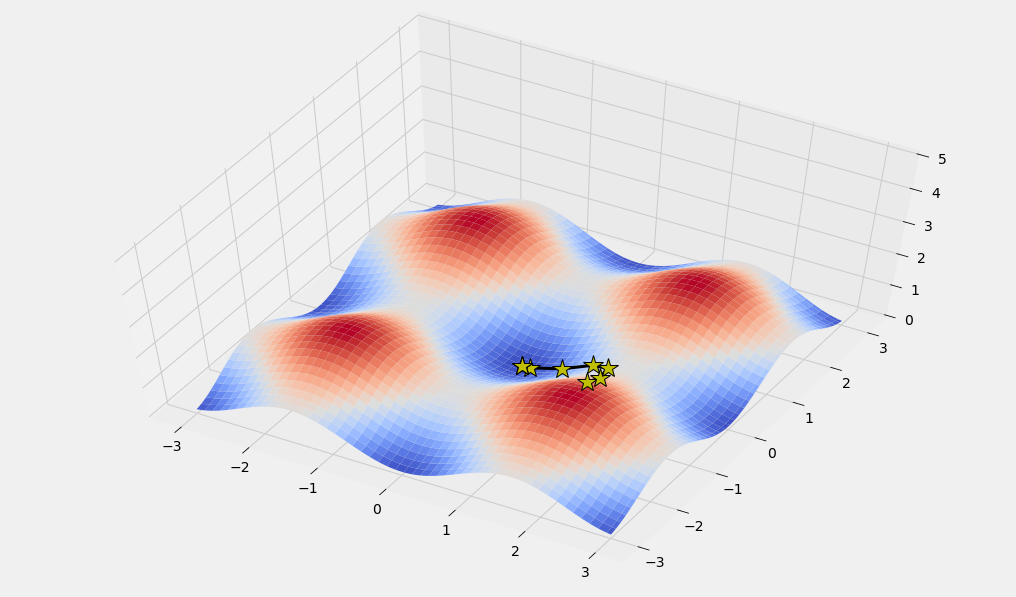

In [58]:
# %matplotlib osx

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

path = []

X, Y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

fig = plt.figure(figsize=(16, 10))
ax = fig.gca(projection='3d')

ax.plot(xs=steps[:, 0], ys=steps[:, 1], zs=steps[:, 2], marker='*', markersize=20,
                markerfacecolor='y', lw=3, c='black')

ax.plot_surface(X, Y, f(X, Y), cmap=cm.coolwarm)
ax.set_zlim(0, 5)
ax.view_init(elev=60)
plt.show()

#### Ответ на КР  №1

Запустите Вашу функцию grad_descent c параметрами lr=0.3, num_iter=20 и начальными приближениями  cur_x1, cur_x2 = 1.5, -1. Сумма значений x1, x2 и f(x1, x2) (т.е. сумма значений в steps[-1]), умноженная на 10\**6 и округленная до 2 знаков после запятой, будет ответом на первый вопрос кр.

In [59]:
steps = grad_descent(lr=0.3, num_iter=20)
np.sum(steps[-1]) * 10**6

5.8474610183441325

### 2. Линейные модели

Возьмем код для линейной регресси с семинара. Напомним, что найти веса W и b для линейной регресси можно двумя способами: обращением матриц (функция solve_weights) и градиентным спуском (функция grad_descent). Мы здесь будем рассматривать градиентный спуск.

In [60]:
W = None
b = None

def mse(preds, y): #Метод наименьших квадратов
    return ((preds - y)**2).mean()
    
def grad_descent(X, y, lr, num_iter=100):
    global W, b
    np.random.seed(40)
    W = np.random.rand(X.shape[1]) #Массив весов наших признаков
    b = np.array(np.random.rand(1)) #?????/
    
    losses = [] #массив значений функции ошибок (потерь)
    
    N = X.shape[0] #зачем используем?
    for iter_num in range(num_iter):
        preds = predict(X) #предсказанные значения 
        print(mse(preds, y))
        losses.append(mse(preds, y))
        
        w_grad = np.zeros_like(W) #заполняем нулями
        b_grad = 0 #???
        for sample, prediction, label in zip(X, preds, y):
            w_grad += 2 * (prediction - label) * sample
            b_grad += 2 * (prediction - label) * 1 #так как берем производную во внутренней функции по b, а там коэффициент 1
            
        W -= lr * w_grad
        b -= lr * b_grad
    #preds = predict(X)
    print(mse(preds, y))
    losses.append(mse(preds, y)) #СПРОСИТЬ ПОЧЕМУ ЗАКЛЮЧИТЕЛЬНЫЕ ЗНАЧЕНИЯ НЕ ДОБАВЛЯЮТСЯ В losses
    return losses

def predict(X): # по сути наша система уравнений (см. семинар_2)
    global W, b
    return np.squeeze(X @ W + b.reshape(-1, 1))

Рассмотрим функцию:  

$$f(x, y) = 0.43x+0.5y + 0.67$$  

***Friendly reminder:***  
Что мы хотим? Мы хотим уметь "восстанавливать функцию" -- то есть предсказывать значения функции в точках с координатами (x, y) (именно так и получается 3D-график -- (x, y, f(x,y)) в пространстве).  
В чём сложность? Нам дан только конечный небольшой набор точек (30 в данном случае), по которому мы хотим восстановить зависимость, по сути, непрерывную. Линейная регрессия как раз подходит для восстановления линейной зависимости (а у нас функция сейчас как раз линейная -- только сложение аргументов и умножение на число).

Cгерерируем шумные данные из этой функции (как на семинаре):

In [61]:
np.random.seed(40)
func = lambda x, y: (0.43*x + 0.5*y + 0.67 + np.random.normal(0, 7, size=x.shape))

X = np.random.sample(size=(30)) * 10 #подумать почему значения одинаквые всегда

#for ind, i in enumerate(X): #ЕСЛИ УБРАТЬ КОМЕНТАРИИ ТО ДАННЫЕ НОРМАЛИЗУЮТСЯ
#    X[ind] = (i-min(X))/(max(X)-min(X)) #ЕСЛИ УБРАТЬ КОМЕНТАРИИ ТО ДАННЫЕ НОРМАЛИЗУЮТСЯ

Y = np.random.sample(size=(30)) * 150

#for ind, i in enumerate(Y): #ЕСЛИ УБРАТЬ КОМЕНТАРИИ ТО ДАННЫЕ НОРМАЛИЗУЮТСЯ
#    Y[ind] = (i-min(Y))/(max(Y)-min(Y)) #ЕСЛИ УБРАТЬ КОМЕНТАРИИ ТО ДАННЫЕ НОРМАЛИЗУЮТСЯ

result_train = [func(x, y) for x, y in zip(X, Y)]
data_train = np.concatenate([X.reshape(-1, 1), Y.reshape(-1, 1)], axis=1)

pd.DataFrame({'x': X, 'y': Y, 'res': result_train}).head()

,x,y,res
0,4.076870,95.538336,50.402755
1,0.553660,54.344384,20.324860
2,7.885349,2.186182,1.304317
3,2.873052,81.297734,28.323912
4,4.503506,47.723322,36.323593


Посмотрим, что же мы сгенерировали:

In [62]:
%matplotlib osx

fig = plt.figure(figsize=(16, 10))
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(np.linspace(0, 10, 100), np.linspace(0, 150, 100))
ax.scatter(xs=data_train[:, 0], ys=data_train[:, 1], zs=result_train, c='r')
ax.plot_surface(X,Y, 0.43*X + 0.5*Y + 0.67, color='green', alpha=0.3)

ax.view_init(elev=60)
plt.ion()

Теперь давайте попробуем применить к этим данным нашу линейную регрессию и с помощью неё предсказать истинный график функции:

In [63]:
losses = grad_descent(data_train, result_train, 1e-2, 5)

1442.7989128146944
25171877917.86653
4.551651431919612e+17
8.230427179457886e+24
1.4882495412833242e+32
1.4882495412833242e+32


In [64]:
W, b

(array([3.21931669e+16, 6.15262272e+17]), array([6.1738737e+15]))

Посмотрим на график лосса:

In [67]:
plt.plot(losses), losses[-1];

И на полученную разделяющую плоскость:

In [66]:
# %matplotlib osx

fig = plt.figure(figsize=(16, 10))
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(np.linspace(0, 10, 100), np.linspace(0, 150, 100))
ax.scatter(xs=data_train[:, 0], ys=data_train[:, 1], zs=result_train, c='r')
ax.plot_surface(X,Y, 0.43*X + 0.5*Y + 0.67, color='green', alpha=0.3)
ax.plot_surface(X,Y, W[0]*X + W[1]*Y + b, color='blue', alpha=0.3)

ax.view_init(elev=10)

(зелёная плоскость -- истинная функция, синяя плоскость -- предсказание)

Охх, лосс и коэффициенты (W и b) нашей модели быстро уходит в небеса, и график предсказан неправильно. Почему такое происходит?

В данном случае дело в том, что признаки имеют разный *масштаб* (посмотрите на значения X и Y -- они лежат в разных диапазонах). Многие модели машинного обучения, в том числе линейные, будут плохо работать в таком случае (на самом деле это зависит от метода оптимизации, сейчас это градиентный спуск).  

Есть несколько способов **масштабирования**:
1. **Нормализация (она же стандартизация, StandardScaling)**:  

$$x_{ij} = \frac{x_{ij} - \mu_j}{\sigma_j}$$  
(j -- номер признака, i -- номер объекта)  
То есть вычитаем среднее по столбцу и делим на корень из дисперсии.

2. **Приведение к отрезку [0,1] (MinMaxScaling)**:  

$$x_{ij} = \frac{x_{ij} - \min_j}{\max_j - \min_j}$$  
(j -- номер признака, i -- номер объекта)  
То есть вычитаем минимум по столбцу и делим на разницу между минимумом и максимумом.
                                      
                                      !НО ОБ ЭТОМ НА СЛЕДУЮЩЕМ СЕМИНАРЕ!